`DESCRIÇÃO DOS ATRIBUTOS:`
            
1. Day_of_Week {'Thursday', 'Monday', 'Sunday', 'Tuesday', 'Friday', 'Wednesday','Saturday'}  

2. Junction_Detail {'T or staggered junction', 'Crossroads','Not at junction or within 20 metres', 'Roundabout','Mini-roundabout', 'More than 4 arms (not roundabout)','Private drive or entrance', 'Slip road', 'Other junction'}           

3. Accident_Injuries {'Serious', 'Slight', 'Fatal'}    

4. Light_Conditions {'Day', 'Darkness - lights lit', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting'}       

5. Number_of_Casualties {1, 11,  3,  2,  4,  5,  6, 10,  8,  7,  9, 13, 12, 14, 16, 18, 15, 19, 21, 17, 27, 48, 40, 24, 26, 22, 42, 43}      

6. Number_of_Vehicles {2,  1,  3,  4,  5,  9,  6,  8,  7, 10, 16, 13, 14, 11, 12, 32, 19}   

7. Road_Surface_Conditions {'Dry', 'Wet or damp', 'Frost or ice', 'Snow','Flood over 3cm. deep'}

8. Road_Type {'One way street', 'Single carriageway', 'Dual carriageway','Roundabout', 'Slip road'}         

9. Speed_limit {30, 20, 50, 40, 70, 60, 10, 15}     

10. Hour_of_Accident {3-6, 6-9, 9-12, 12-15, 15-18, 18-21, 21-24}

11. Urban_or_Rural_Area {'Urban', 'Rural'}   

12. Weather_Conditions {'Fine no high winds', 'Other', 'Raining no high winds','Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist'}   

13. Vehicle_Type {'Car', 'Taxi', 'Motorcycle', 'Van', 'Other', 'Bus', 'Pedal cycle','Ridden horse'}

In [ ]:
!pip install pydotplus dtreeviz graphvizp

ERROR: Could not find a version that satisfies the requirement graphvizp (from versions: none)
ERROR: No matching distribution found for graphvizp


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_excel('dataset.xlsx')
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


### Carga dos dados e particionamento das bases de treinamento e teste

`train_test_split(X, y) -- PARTICIONA A BASE DE DADOS EM BASES DE TREINAMENTO E TESTE.`

Por padrão, 75% da base é utilizada para treinamento e 25% para testes.

No código a seguir, usaremos 15% para teste e 85% para treinamento:



In [ ]:
# Agrupando os dados
aggregated_data = df.groupby(['Hour', 'Weekend?', 'Primary Factor']).size().reset_index(name='Quantidade')

# Separando as features e o target
X = aggregated_data[['Hour', 'Weekend?', 'Primary Factor']]
y = aggregated_data['Quantidade']

# Convertendo variáveis categóricas em variáveis dummy
X = pd.get_dummies(X)

# Dividindo o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [ ]:
# Criando e treinando a árvore de decisão com poda
max_depth_value = 4  # Ajuste a profundidade conforme necessário
regressor = DecisionTreeRegressor(random_state=42, max_depth=max_depth_value)
regressor.fit(X_train, y_train)

# Fazendo previsões para o conjunto de teste
y_test_pred = regressor.predict(X_test)

# Calculando o MAE (Erro Médio Absoluto)
mae = mean_absolute_error(y_test, y_test_pred)
print(f'MAE (Erro Médio Absoluto): {mae}')

# Calculando o RMSE (Raiz do Erro Quadrático Médio)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print(f'RMSE (Raiz do Erro Quadrático Médio): {rmse}')

# Criando e treinando o modelo Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Fazendo previsões
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)

# Avaliando o modelo na base de treinamento
train_r2_rf = r2_score(y_train, y_train_pred_rf)
print(f'Treinamento - Coeficiente de Determinação (R²): {train_r2_rf}')

# Avaliando o modelo na base de teste
test_r2_rf = r2_score(y_test, y_test_pred_rf)
print(f'Teste - Coeficiente de Determinação (R²): {test_r2_rf}')

MAE (Erro Médio Absoluto): 24.066471023556392
RMSE (Raiz do Erro Quadrático Médio): 46.11082794174601
Treinamento - Coeficiente de Determinação (R²): 0.9889122346333568
Teste - Coeficiente de Determinação (R²): 0.9558860637331806


### Exibição da árvore de decisão

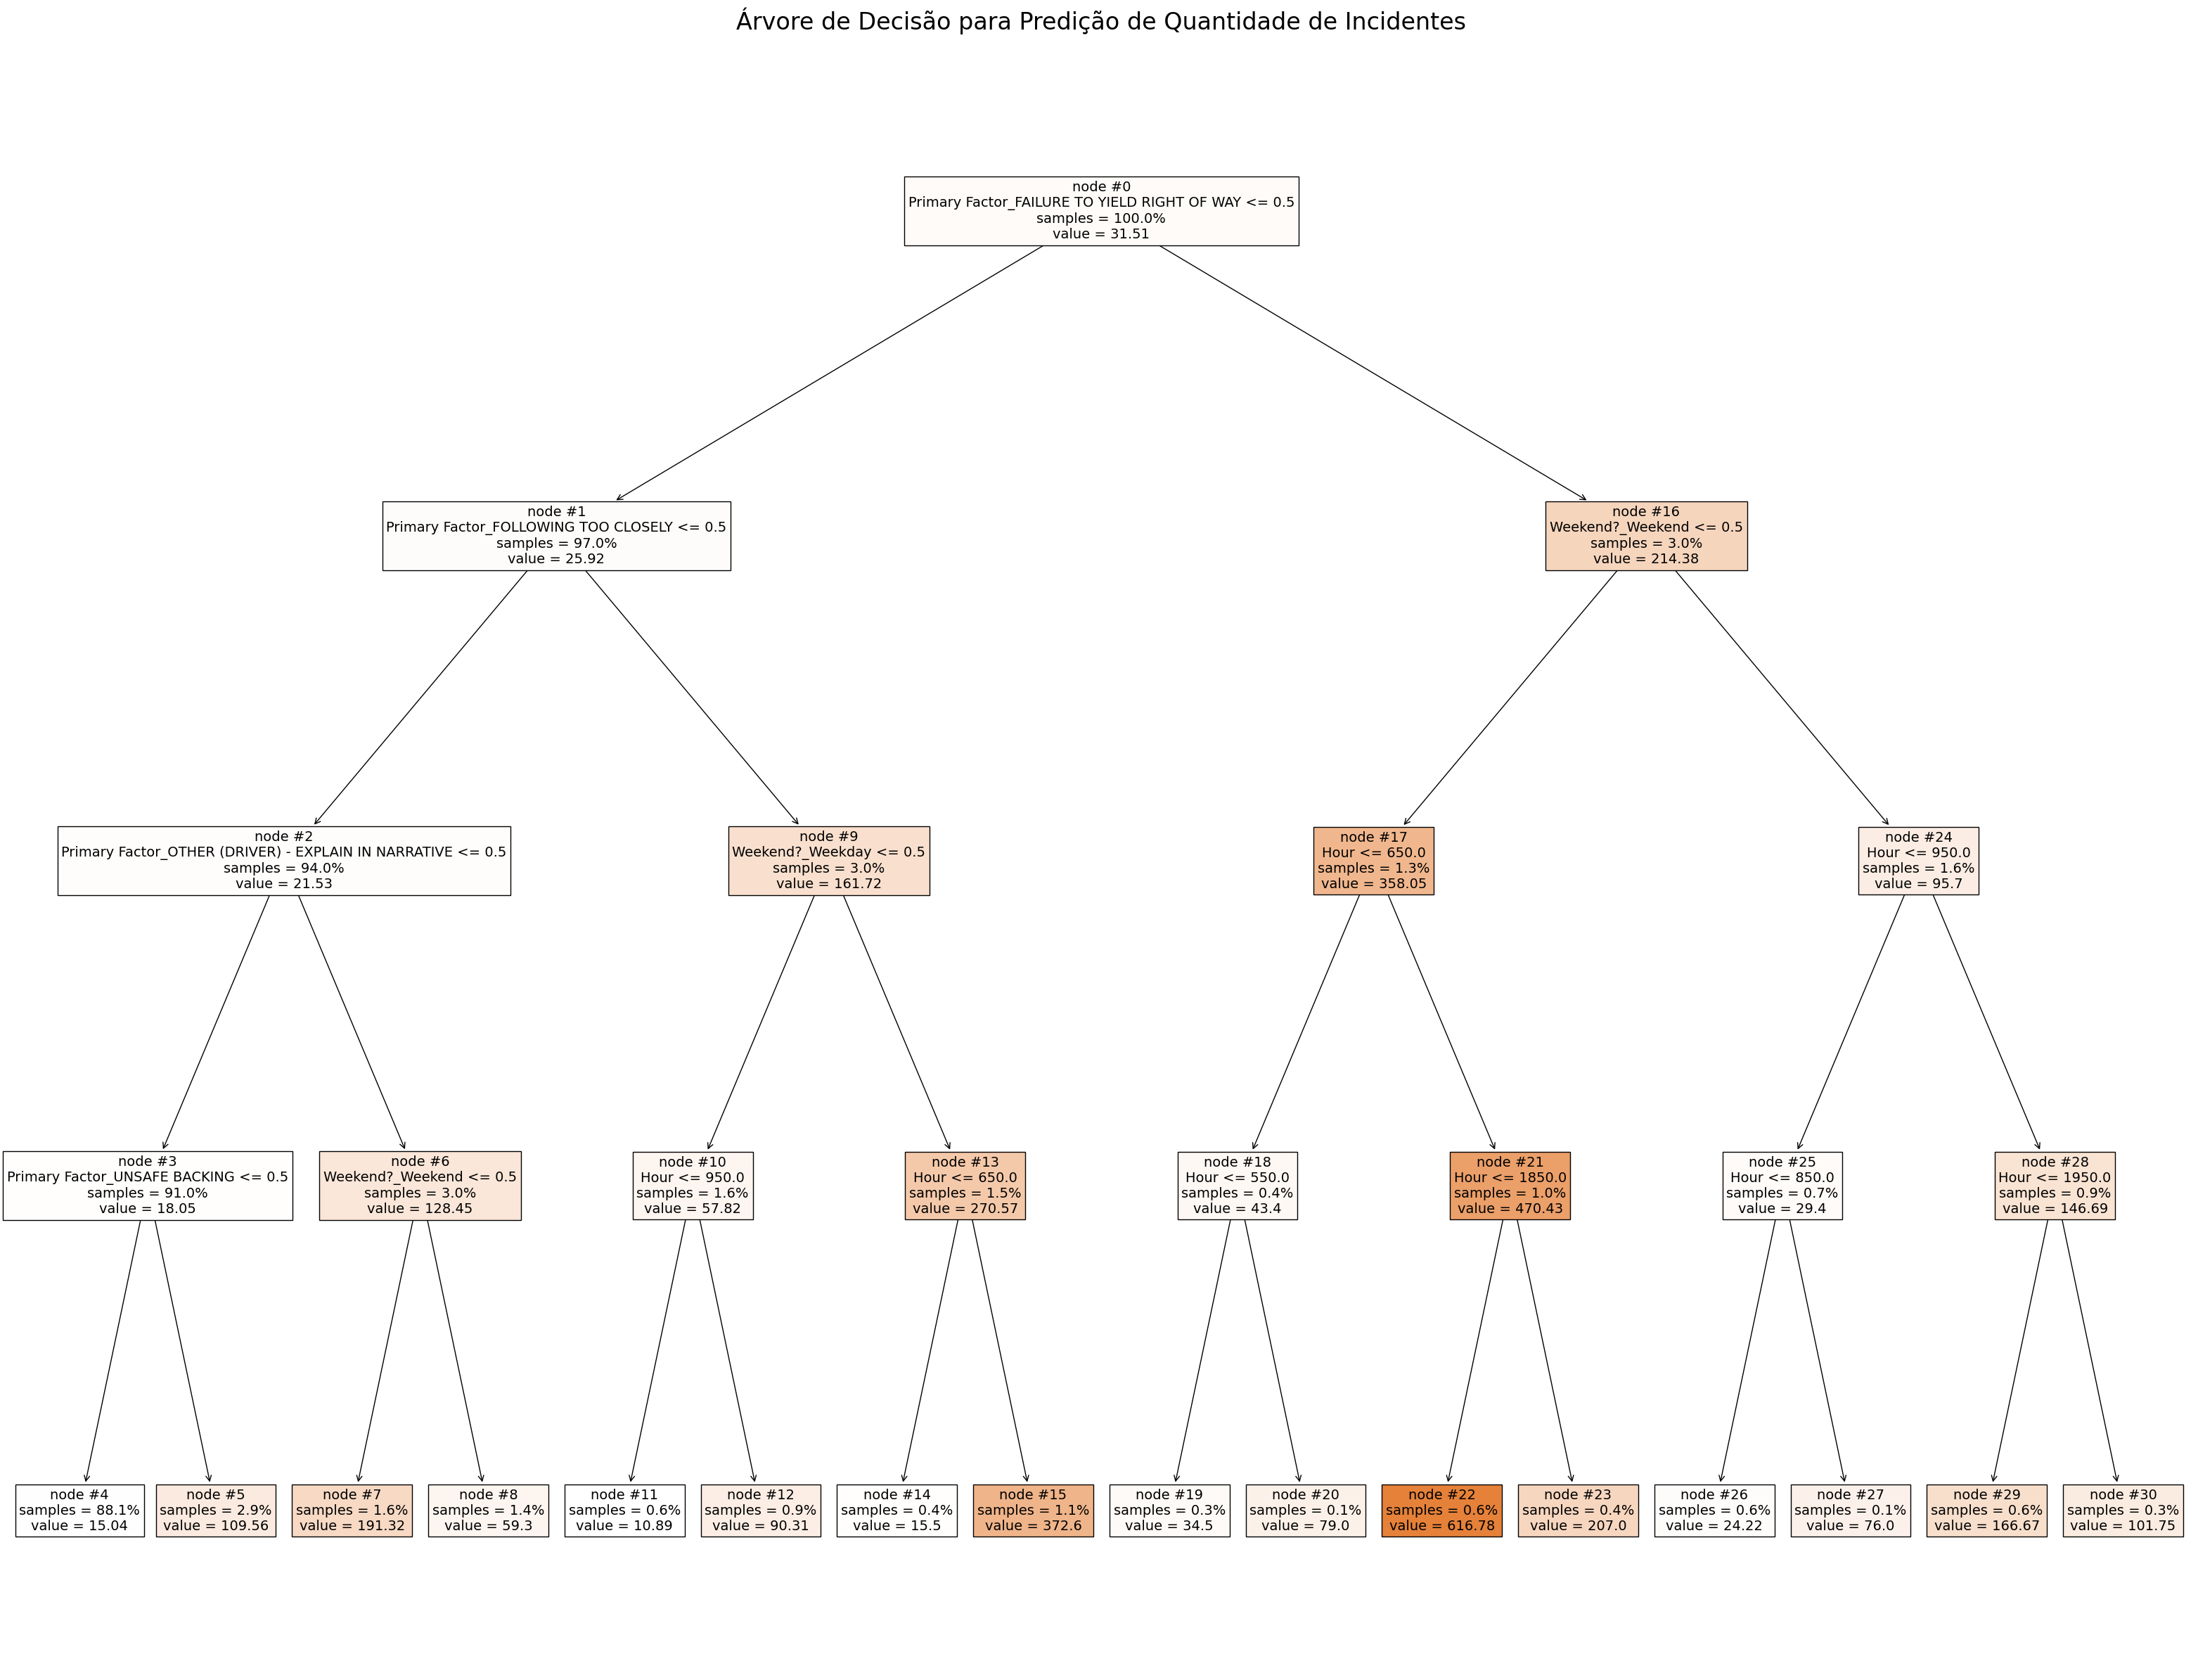

In [ ]:
# Ajustar o tamanho da figura e o espaçamento dos nós
plt.figure(figsize=(40, 30))

# Ajustar a profundidade máxima dos rótulos para evitar sobreposição
plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=14, precision=2, proportion=True, node_ids=True, impurity=False, label='all')

# Adicionar título e ajustar fonte
plt.title("Árvore de Decisão para Predição de Quantidade de Incidentes", fontsize=24, pad=20)

# Mostrar a figura
plt.show()